In [58]:
# #SOLUTION_START
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
#SOLUTION_END

Task 2: Choose a seaborn style for plots

In [59]:
#SOLUTION_START
sns.set()
#SOLUTION_END


Task 3:Load the dataset
Load the 'concrete_data.csv' from the data directory and display the first rows


In [60]:
#SOLUTION_START
df = pd.read_csv('data/concrete_data.csv')
# Display the first few rows to understand the structure of the dataset
df.head()
#SOLUTION_END

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Task 4: Exploratory Data Analysis : Understand the dataset by displaying some statistics and check for missing values

In [61]:
#SOLUTION_START
df.describe()
# Check for any missing values in the dataset
df.isnull().sum()
#SOLUTION_END

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

Task 5: Plot a heatmap of the correlation matrix to understand the relationships between variables and the target.

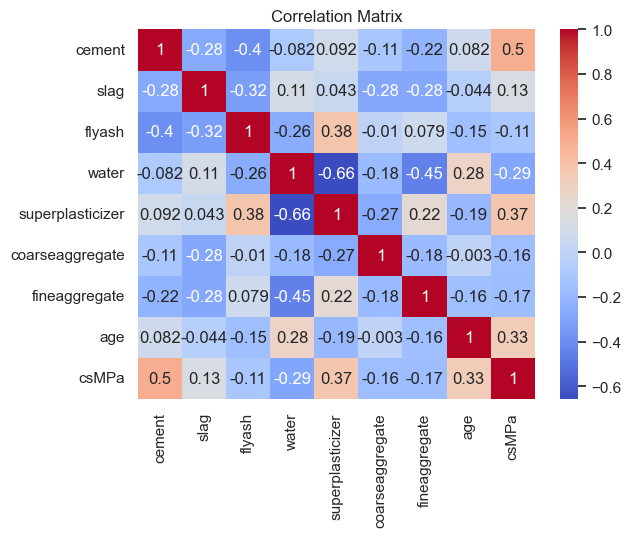

In [62]:
#SOLUTION_START
# plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
#SOLUTION_END

Task 6: Perform a simple Linear Regression with One Feature (use a test and training set)
What feature seems to be the best candidate for the job?
Make the predictions for the test set

In [63]:
#SOLUTION_START

# Select the feature (X) and the target variable (y)
X = df[['cement']]
y = df['csMPa']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
lin_reg_one = LinearRegression()

# Train the model
lin_reg_one.fit(X_train, y_train)
# Predict on the test set
y_pred_one = lin_reg_one.predict(X_test)
#SOLUTION_END

Task 7: Calculate and display the R-squared and Mean Squared Error (MSE) for the simple linear regression

In [64]:
#SOLUTION_START
print(f"R-squared (Simple Linear Regression): {r2_score(y_test, y_pred_one)}")
print(f"Mean Squared Error (Simple Linear Regression): {mean_squared_error(y_test, y_pred_one)}")
#SOLUTION_END

R-squared (Simple Linear Regression): 0.25183513628298093
Mean Squared Error (Simple Linear Regression): 192.78479855432548


Task 8: Plot the regression line along with the test data points and print the intercept and coefficients

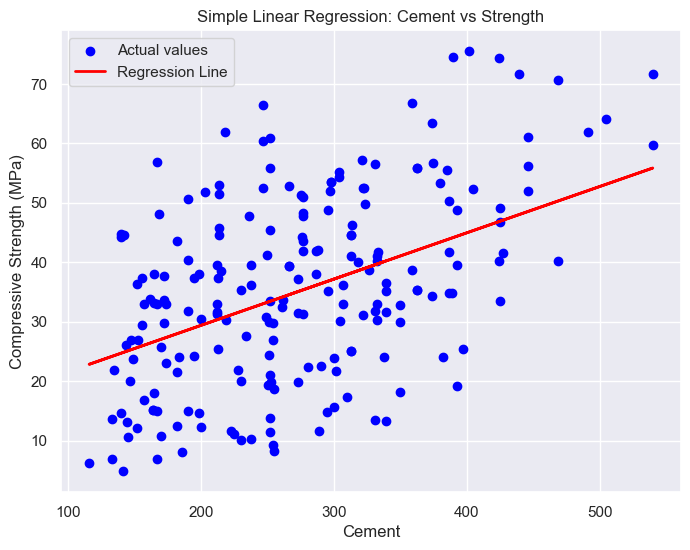

In [65]:
#SOLUTION_START
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred_one, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Cement')
plt.ylabel('Compressive Strength (MPa)')
plt.legend()
plt.title('Simple Linear Regression: Cement vs Strength')
plt.show()
#SOLUTION_END

In [66]:
#SOLUTION_START
print("the intercept:",lin_reg_one.intercept_)
print("the coefficients",lin_reg_one.coef_)
#SOLUTION_END

the intercept: 13.785171881915776
the coefficients [0.07789607]


Task 9:As we see the feature explain the compressive strength not to well. We continue our search for a better model:
include more than one variable in our regression model. What other 2 features are possible good candidates?
Make predictions for the test set and calculate the Mean Squared Error and R-squared. Print the coefficients and the intercept

In [67]:
#SOLUTION_START
# Multiple Linear Regression
# -----------------------------------
#
# Let's include 'Cement', 'Water', and 'Age' as features based on their correlation with the target variable.

# Select multiple features (X) and the target variable (y)
X = df[['cement', 'water', 'age']]
y = df['csMPa']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
lin_regML = LinearRegression()

# Train the model
lin_regML.fit(X_train, y_train)

# Predict on the test set
y_predML = lin_regML.predict(X_test)


print(f"R-squared (Multiple Linear Regression): {r2_score(y_test, y_predML)}")
print(f"Mean Squared Error (Multiple Linear Regression): {mean_squared_error(y_test, y_predML)}")
print("the intercept:",lin_regML.intercept_)
print("the coefficients",lin_regML.coef_)
#SOLUTION_END

R-squared (Multiple Linear Regression): 0.5003324674025951
Mean Squared Error (Multiple Linear Regression): 128.75277801386054
the intercept: 62.1858964292649
the coefficients [ 0.06770251 -0.27644885  0.10625113]


Task 10: Polynomial Regression:
Perform Polynomial Regression to capture non-linear relationships.
Let's use the 3 features and apply a 4nd-degree polynomial transformation
How many coefficients do we obtain? Why?
Print the R-squared, MSE and the coefficients.

In [68]:
#SOLUTION_START
# Select the feature
X = df[['cement','age','water']]
y = df['csMPa']

# Create polynomial features (degree=4)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create a linear regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Task: Calculate and display the R-squared and Mean Squared Error (MSE) for Polynomial Regression
print(f"R-squared (Polynomial Regression): {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error (Polynomial Regression): {mean_squared_error(y_test, y_pred)}")
print("the intercept:",lin_reg.intercept_)
print("the coefficients",lin_reg.coef_)
print("the number of coeeficients is:",len(lin_reg.coef_))
#SOLUTION_END

R-squared (Polynomial Regression): 0.6771092339883035
Mean Squared Error (Polynomial Regression): 83.20148980447334
the intercept: -659.1555450347566
the coefficients [ 0.00000000e+00  8.65333456e-01  1.04324074e+00  1.03154709e+01
 -1.41639705e-03  1.09779233e-03 -3.24773331e-03 -4.92124486e-03
 -5.38150144e-03 -5.64336086e-02  1.89446543e-07  2.22388120e-07
  6.63859549e-06  5.26689437e-07 -6.79154435e-06 -3.85642134e-06
  8.07338630e-06  1.15037252e-07  2.03644073e-05  1.06366862e-04]
the number of coeeficients is: 20



Task 12: Ridge Regression (L2 Regularization)
Apply Ridge regression to reduce overfitting by penalizing large coefficients for the linear model.
Why do we need a standardscaler here? Explain

In [69]:
#SOLUTION_START
# Apply Ridge regression to reduce overfitting by penalizing large coefficients.

# Select multiple features (X) and the target variable (y)
X = df[['cement', 'water', 'age']]
y = df['csMPa']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for Ridge and Lasso)
# if we do not standardize then feature with higher values for the variables will be treated different as feature with smaller absolute values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Ridge regression model with alpha (regularization strength) set to 1.0
ridge_reg = Ridge(alpha=1.0)

# Train the Ridge regression model
ridge_reg.fit(X_train, y_train)

# Predict on the test set using the Ridge model
y_pred_ridge = ridge_reg.predict(X_test)

# Task: Calculate and display the R-squared and Mean Squared Error (MSE) for Ridge Regression
print(f"R-squared (Ridge Regression): {r2_score(y_test, y_pred_ridge)}")
print(f"Mean Squared Error (Ridge Regression): {mean_squared_error(y_test, y_pred_ridge)}")
print("the intercept:",ridge_reg.intercept_)
print("the coefficients",ridge_reg.coef_)
#SOLUTION_END

R-squared (Ridge Regression): 0.5002582790404853
Mean Squared Error (Ridge Regression): 128.7718946406069
the intercept: 35.85786407766991
the coefficients [ 7.26888252 -5.88181416  6.41227944]


Task 13: Can you explain why we get other coefficients but nearly the same R-square?
Prove your point by proving the code


In [70]:
#SOLUTION_START
#We used a standard scaler in the ridge regression.
#Show that in fact we have the same results

# Select multiple features (X) and the target variable (y)
X = df[['cement', 'water', 'age']]
y = df['csMPa']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a linear regression model
lin_regML = LinearRegression()

# Train the model
lin_regML.fit(X_train, y_train)

# Predict on the test set
y_predML = lin_regML.predict(X_test)


print(f"R-squared (Multiple Linear Regression): {r2_score(y_test, y_predML)}")
print(f"Mean Squared Error (Multiple Linear Regression): {mean_squared_error(y_test, y_predML)}")
print("the intercept:",lin_regML.intercept_)
print("the coefficients",lin_regML.coef_)
#SOLUTION_END

R-squared (Multiple Linear Regression): 0.5003324674025951
Mean Squared Error (Multiple Linear Regression): 128.7527780138605
the intercept: 35.85786407766991
the coefficients [ 7.27606536 -5.89083809  6.42171137]


Task 14: Finally apply ridge regression on the 3 features with a polynomial degree of 4. Use a pipeline and print out the coefficients. How many coefficients do we retain?

In [71]:
#SOLUTION_START
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

X = df[['cement', 'water', 'age']]
y = df['csMPa']

degree = 3
ridge_poly = make_pipeline(StandardScaler(), PolynomialFeatures(degree=degree), Ridge(alpha=1.0))

# Train the model
ridge_poly.fit(X_train, y_train)

# Predict on the test set
y_pred = ridge_poly.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = ridge_poly.score(X_test, y_test)

print(f"R-squared (Polynomial Ridge Regression with StandardScaler, degree={degree}): {r2}")
print(f"Mean Squared Error (Polynomial Ridge Regression with StandardScaler): {mse}")

# Obtain the coefficients from the Ridge model
ridge_model = ridge_poly.named_steps['ridge']
poly_features = ridge_poly.named_steps['polynomialfeatures']

# Get the names of the features created by PolynomialFeatures
feature_names = poly_features.get_feature_names_out(['cement','age','water'])

# Print the coefficients along with the feature names
print("Feature Coefficients:")
count=0
for feature, coef in zip(feature_names, ridge_model.coef_):
    count=count+1
    print(f"{feature}: {coef}")

print("The number of coefficients is",count)
#SOLUTION_END


R-squared (Polynomial Ridge Regression with StandardScaler, degree=3): 0.6786109465698253
Mean Squared Error (Polynomial Ridge Regression with StandardScaler): 82.81453317024055
Feature Coefficients:
1: 0.0
cement: 8.000907298078845
age: -9.279683497995478
water: 20.379100462629506
cement^2: -0.44782372740443777
cement age: -2.7177331760364534
cement water: 0.18590233353134186
age^2: 0.640615100845589
age water: 0.10053180477643522
water^2: -13.23603321772154
cement^3: 0.2420528453227116
cement^2 age: 1.6173954795980232
cement^2 water: 0.1838920183132955
cement age^2: -0.1799277373511268
cement age water: -0.9289513566276795
cement water^2: 0.20535592802153196
age^3: 1.0250085155975497
age^2 water: 0.5895572592085987
age water^2: -0.0024756983706445985
water^3: 1.7606691603894473
The number of coefficients is 20


Which model(s) would you retain ? What would you propose as a next step?


In [ ]:
#SOLUTION_START
#the polynomial models seems to be the best. We see that there is little difference in the ridge or the non-ridge model R-squared= around 0.67 and both needed 20 variables
#SOLUTION_END